In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import simplefilter
simplefilter(action='ignore', category = FutureWarning)

In [2]:
df = pd.read_csv('cleveland.csv', header = None)
df.columns = ['age', 'sex', 'cp', 'trestbps', 'chol',
              'fbs', 'restecg', 'thalach', 'exang', 
              'oldpeak', 'slope', 'ca', 'thal', 'target']

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


In [4]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
target      0
dtype: int64

In [5]:
df['target'] = df.target.map({0: 0, 1: 1, 2: 1, 3: 1, 4: 1})
df['sex'] = df.sex.map({0: 'female', 1: 'male'})
df['thal'] = df.thal.fillna(df.thal.mean())
df['ca'] = df.ca.fillna(df.ca.mean())

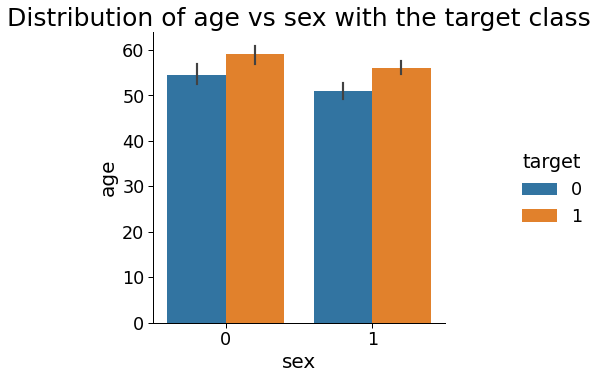

In [9]:
# barplot of age vs sex with hue = target
sns.catplot(kind = 'bar', data = df, y = 'age', x = 'sex', hue = 'target')
plt.title('Distribution of age vs sex with the target class')
plt.show()


In [8]:
df['sex'] = df.sex.map({'female': 0, 'male': 1})

In [10]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [12]:
from sklearn.preprocessing import StandardScaler as ss
sc = ss()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [13]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)

DecisionTreeClassifier()

In [15]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix
cm_test = confusion_matrix(y_pred, y_test)

y_pred_train = classifier.predict(X_train)
cm_train = confusion_matrix(y_pred_train, y_train)

print('Accuracy for training set for Decision Tree = {}'.format((cm_train[0][0] + cm_train[1][1])/len(y_train)))
print('Accuracy for test set for Decision Tree = {}'.format((cm_test[0][0] + cm_test[1][1])/len(y_test)))


Accuracy for training set for Decision Tree = 1.0
Accuracy for test set for Decision Tree = 0.7704918032786885
